<a href="https://colab.research.google.com/github/LuanPCunha/TCC/blob/main/Treinamento_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rotinas de Treinamento


## Configurações Iniciais 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import string, re
import itertools
import nltk
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.callbacks import EarlyStopping
py.init_notebook_mode(connected=True)
%matplotlib inline
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [3]:
def tokenize(tweets_list):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(tweets_list)
    return tokenizer.texts_to_sequences(tweets_list), tokenizer

In [4]:
def pad(text_tokenized, length=None):
    return pad_sequences(text_tokenized, maxlen=length, padding='post')

In [5]:
def preprocess(tweets_list, max_text_length):
   
    preprocess_tweets_list, tweets_list_tokenizer = tokenize(tweets_list)

    preprocess_tweets_list = pad(preprocess_tweets_list, length=max_text_length)

    return preprocess_tweets_list, tweets_list_tokenizer

In [6]:
# CONSTANTES DOS RESULTADOS
REDE = 'NaiveBayes'

BASE_0 = 'BASE 0'
BASE_1 = 'BASE 1'
BASE_2 = 'BASE 2'

# Caminho arquivo de saída
PATH_ARQ_SAIDA = "/content/drive/MyDrive/TCC/resultados/resultados.csv"

#  rede base otimizador acuracia val_loss learning_rate dropout batch_size roc_curve train_resume confusion_matrix
resultados = pd.read_csv(PATH_ARQ_SAIDA, index_col=0)
resultados.head()

,rede,base,otimizador,acuracia,val_loss,learning_rate,dropout,batch_size,roc_curve,train_resume,confusion_matrix
0,CNN,BASE 2,Nadam,0.938061,0.201470,0.0001,0.1,32,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 1000, ""01"": 58, ""10"": 73, ""11"": 984}"
1,CNN,BASE 2,Nadam,0.933333,0.198454,0.0001,0.2,32,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 981, ""01"": 77, ""10"": 64, ""11"": 993}"
2,CNN,BASE 2,Nadam,0.939007,0.197918,0.0001,0.3,32,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 999, ""01"": 59, ""10"": 70, ""11"": 987}"
3,CNN,BASE 2,RMSProp,0.933333,0.215135,0.0001,0.1,32,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 981, ""01"": 77, ""10"": 64, ""11"": 993}"
4,CNN,BASE 2,RMSProp,0.932388,0.217581,0.0001,0.2,32,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 971, ""01"": 87, ""10"": 56, ""11"": 1001}"


## Lendo a Base

In [8]:
# Base1 Com StopWords
PATH_BASE1_JUNTO_COM_DA_LEILA_BALANCEADA = "/content/drive/MyDrive/TCC/dados/processadas/balanceadas/Base1JuntaHateENotHateDaLeila_balanceada.csv"
#MATRIZ_CBOW_300_BASE_1 = loadtxt("/content/drive/MyDrive/TCC/dados/word_embeddings/Matriz_Base1JuntaHateENotHateDaLeila_balanceada_CBOW300.CSV", delimiter=',')

# Base2 Sem StopWords
PATH_BASE2_LEILA_LIMPISSIMA_BALANCEADA = "/content/drive/MyDrive/TCC/dados/processadas/balanceadas/Base2_maior4_menor25_limpissima_balanceada.csv"
#MATRIZ_CBOW_300_BASE_2_LEILA = loadtxt("/content/drive/MyDrive/TCC/dados/word_embeddings/Matriz_Base2_maior4_menor25_limpissima_balanceada_CBOW300.CSV", delimiter=',')

PATH_BASE_1_CLASSIFICADA_BALANCEADA = r"/content/drive/MyDrive/TCC/dados/processadas/balanceadas/Base1_classificada_balanceada.csv" #entrada

PATH_BASE_2_CLASSIFICADA_BALANCEADA = r"/content/drive/MyDrive/TCC/dados/processadas/balanceadas/Base2_classificada_balanceada.csv" #entrada
# MATRIZ_CBOW_300_BASE_2 = loadtxt("/content/drive/MyDrive/TCC/dados/word_embeddings/Matriz_Base2_classificada_balanceada_CBOW300.csv", delimiter=',') #saida

In [9]:
tweets = pd.read_csv(PATH_BASE_2_CLASSIFICADA_BALANCEADA, index_col=0)
text_column = tweets['text']
text_column

0        retwet bahia fazer sendo governada pt sei baia...
1        k imagine atitude mental negativa f idiota fec...
2        general heleno é bolsonaro rosna late late lat...
3        alan ser cara pau achar havendo ruptura nesse ...
4        canalhascomunistas caçarão chapa presidencialn...
                               ...                        
10569               af hein amiga mandar outro número mail
10570    egoísmo é grande parte produto sociedade émile...
10571    abençoado novo linda querida obrigada carinho ...
10572                              leva gente amorzinhos d
10573                                   k k ata meia sonsa
Name: text, Length: 10574, dtype: object

In [10]:
# Pega a média de caracteres dos tweets de toda a base
max_text_length = int(text_column.apply(lambda x: len(str(x).split(' '))).max())
max_text_length

55

In [47]:
# Pega a média de caracteres dos tweets de toda a base
min_text_length = int(text_column.apply(lambda x: len(str(x).split(' '))).min())
min_text_length

3

In [11]:
output_label = tweets['label']
input_data, text_tokenizer = preprocess(text_column, None)
    
text_vocab_size = len(text_tokenizer.word_index)
print("Vocabulary size:", text_vocab_size)

Vocabulary size: 19043


## Naive Bayes

In [18]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [64]:
accuracy = []

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(text_column)

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(text_column, output_label, test_size=0.3, random_state=42)
encoder = preprocessing.LabelEncoder() # !!!
train_y_enc = encoder.fit_transform(train_y)
valid_y_enc = encoder.fit_transform(valid_y)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

# Naive Bayes on Count Vectors
accuracy.append( train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y_enc, xvalid_count))
print ("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  [0.8663725181216514]


In [56]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features = max_text_length)
X = tfidf_vect.fit_transform(text_column)

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, output_label, test_size=0.3, random_state=42)

# Naive Bayes on Word Level TF IDF Vectors
accuracy.append(train_model(naive_bayes.MultinomialNB(), train_x, train_y, valid_x))
print ("NB, WordLevel TF-IDF: ", accuracy)

NB, WordLevel TF-IDF:  [0.8663725181216514, 0.5606681374093917]


In [57]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,2), max_features=max_text_length)
X = tfidf_vect_ngram.fit_transform(text_column)

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, output_label, test_size=0.3, random_state=42)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy.append(train_model(naive_bayes.MultinomialNB(), train_x, train_y, valid_x))
print ("NB, N-Gram(1,2) Vectors: ", accuracy)

NB, N-Gram(1,2) Vectors:  [0.8663725181216514, 0.5606681374093917, 0.5606681374093917]


In [58]:
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=max_text_length)
X = tfidf_vect_ngram.fit_transform(text_column)

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, output_label, test_size=0.3, random_state=42)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy.append(train_model(naive_bayes.MultinomialNB(), train_x, train_y, valid_x))
print ("NB, N-Gram(2,3) Vectors: ", accuracy)

NB, N-Gram(2,3) Vectors:  [0.8663725181216514, 0.5606681374093917, 0.5606681374093917, 0.505830444374409]


In [59]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=max_text_length)
X = tfidf_vect_ngram_chars.fit_transform(text_column) 

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, output_label, test_size=0.3, random_state=42)

# Naive Bayes on Character Level TF IDF Vectors
accuracy.append(train_model(naive_bayes.MultinomialNB(), train_x, train_y, valid_x))
print ("NB, N-Gram(2,3) CharLevel Vectors: ", accuracy)

NB, N-Gram(2,3) CharLevel Vectors:  [0.8663725181216514, 0.5606681374093917, 0.5606681374093917, 0.505830444374409, 0.5263157894736842]


In [65]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(1,120), max_features=max_text_length)
X = tfidf_vect_ngram_chars.fit_transform(text_column) 

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X, output_label, test_size=0.3, random_state=2)

# Naive Bayes on Character Level TF IDF Vectors
accuracy.append(train_model(naive_bayes.MultinomialNB(), train_x, train_y, valid_x))
print ("NB, N-Gram(2,3) CharLevel Vectors: ", accuracy)

NB, N-Gram(2,3) CharLevel Vectors:  [0.8663725181216514, 0.5206429246769618]


No handles with labels found to put in legend.


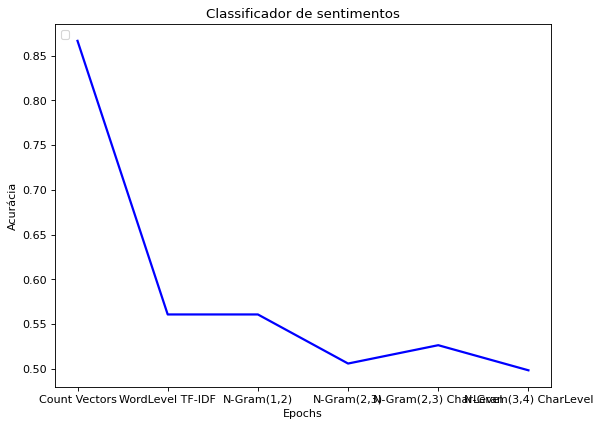

In [61]:
#  # Plot
# plt.figure()
# plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
# plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
# plt.title('Classificador de sentimentos')
# plt.xlabel('Epochs')
# plt.ylabel('Cross-Entropy')
# plt.legend(loc='upper right')
# plt.show()
y = ['Count Vectors','WordLevel TF-IDF','N-Gram(1,2)','N-Gram(2,3)','N-Gram(2,3) CharLevel','N-Gram(3,4) CharLevel']
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(y,accuracy, lw=2.0, color='b')
#plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('Classificador de sentimentos')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.legend(loc='upper left')
plt.show()